# **Comparativa Resultados**

**Comparativa de resultados**


Mejor modelo según AUC-ROC:
Modelo         XGBoost classifier
Accuracy                   0.9167
Precision                     1.0
Recall                   0.705882
F1 Score                 0.827586
AUC-ROC                  0.963064
Log-Loss                 0.292356
MCC                      0.795206
Specificity                   1.0
Name: 0, dtype: object

Mejores modelos por métrica:
       Métrica         Mejor Modelo
0     Accuracy   XGBoost classifier
1    Precision   XGBoost classifier
2       Recall  LightGBM classifier
3     F1 Score        MLPClassifier
4      AUC-ROC   XGBoost classifier
5     Log-Loss  LightGBM classifier
6          MCC   XGBoost classifier
7  Specificity   XGBoost classifier


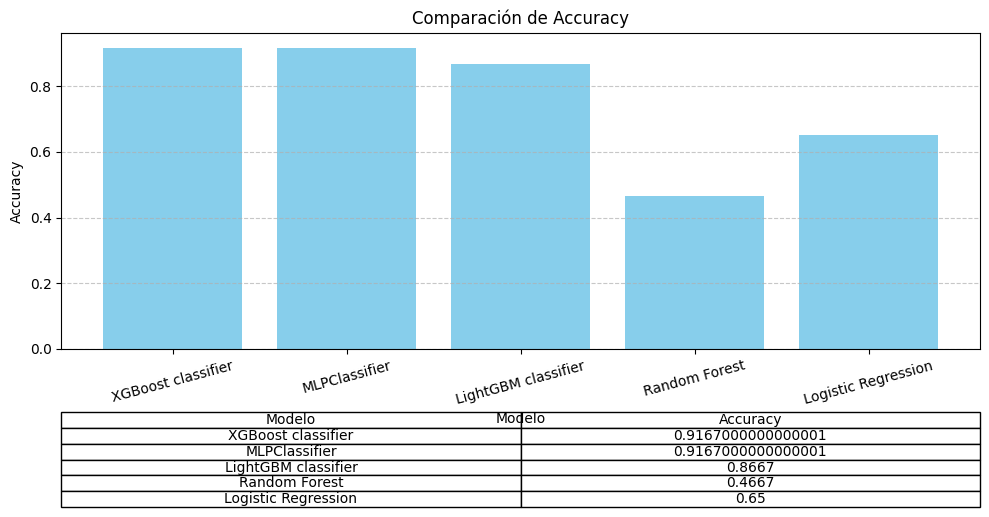

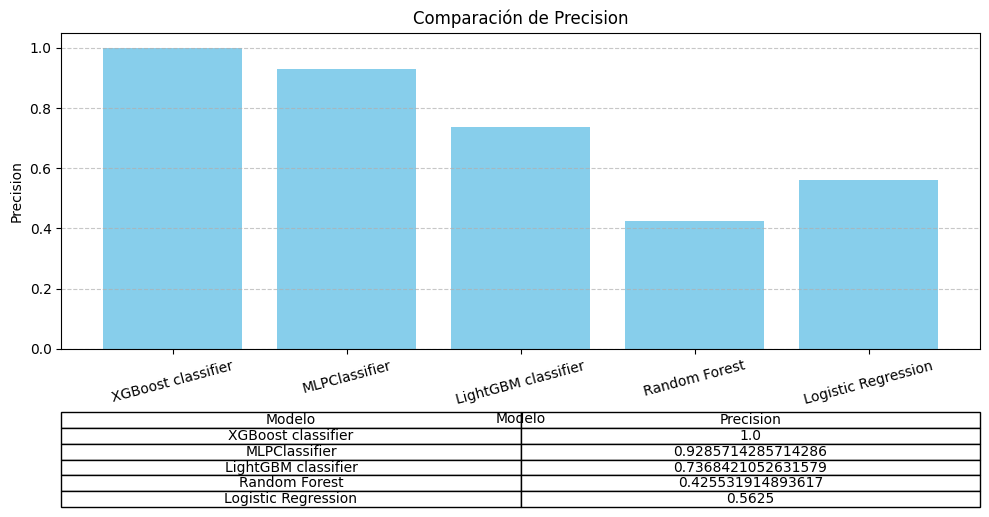

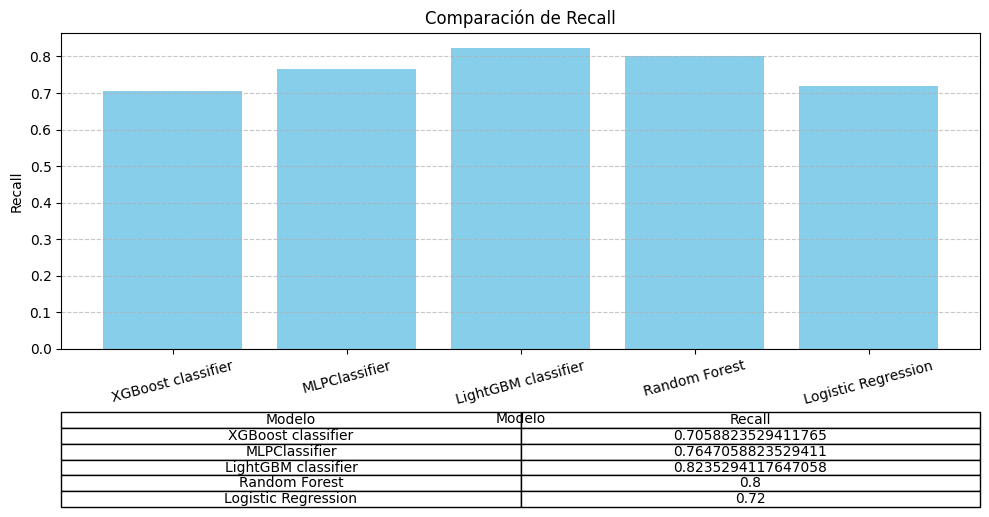

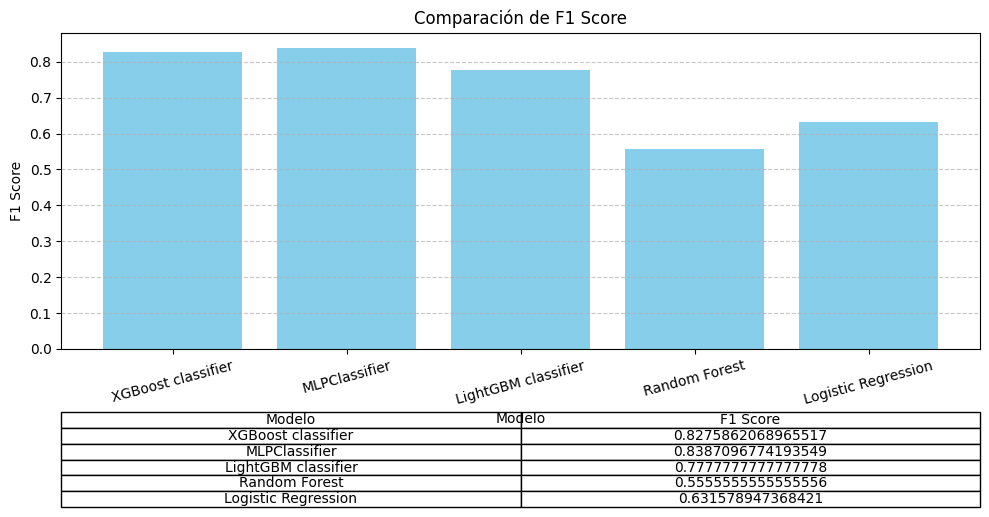

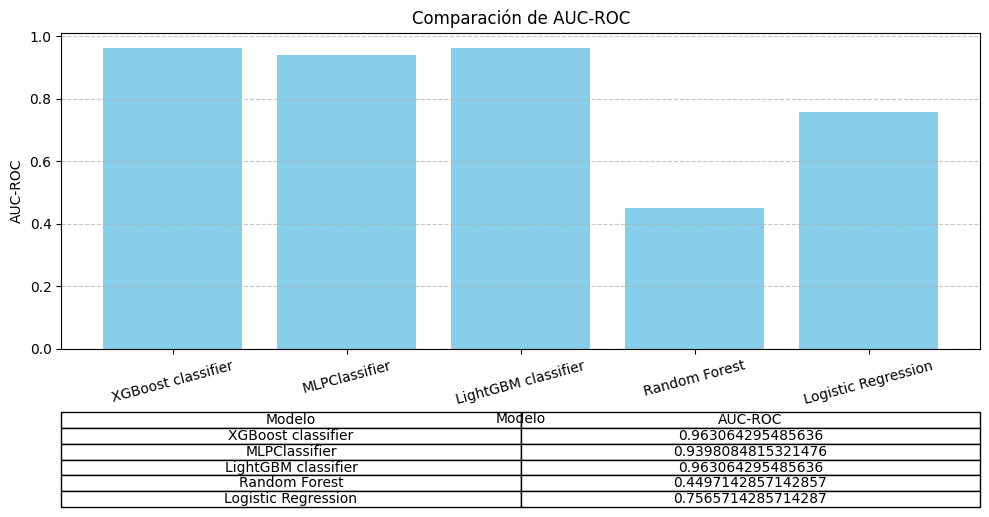

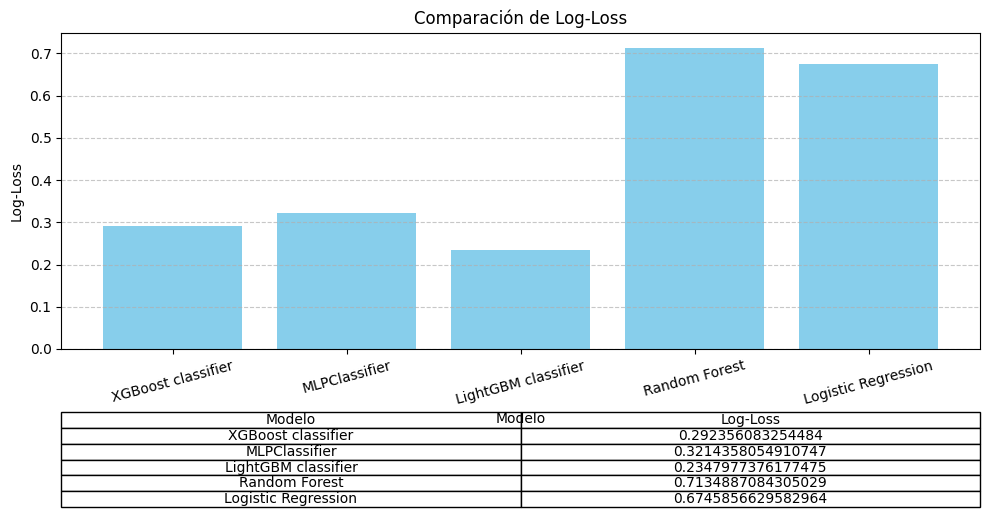

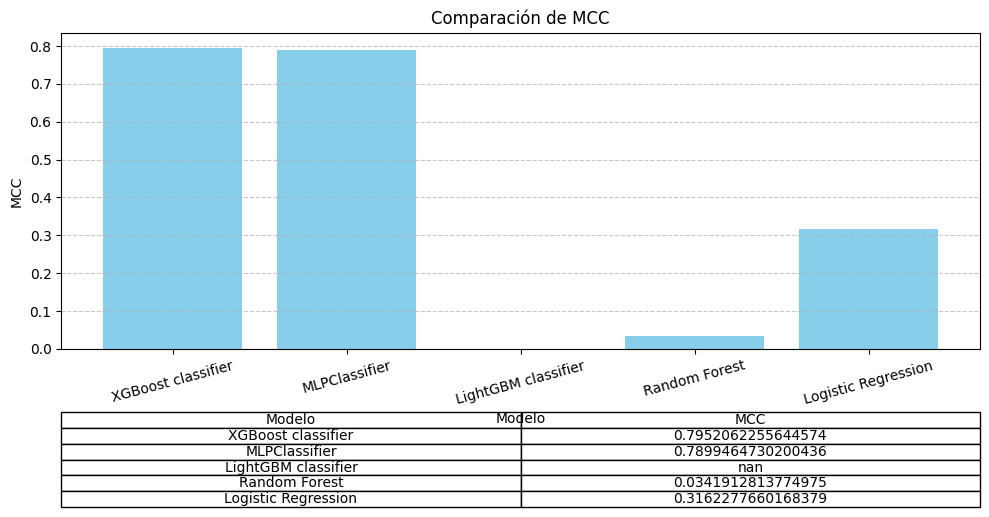

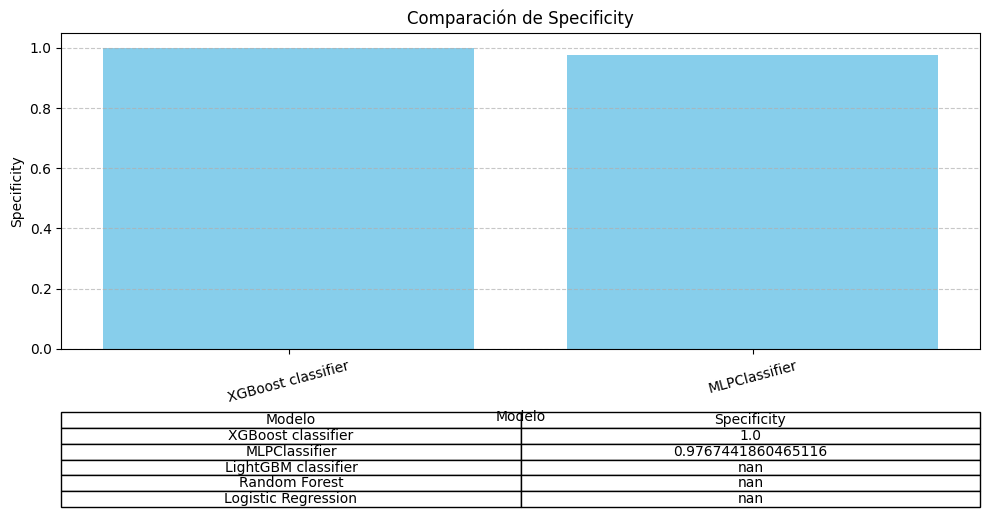


Resumen final de mejores modelos por métrica:
       Métrica         Mejor Modelo
0     Accuracy   XGBoost classifier
1    Precision   XGBoost classifier
2       Recall  LightGBM classifier
3     F1 Score        MLPClassifier
4      AUC-ROC   XGBoost classifier
5     Log-Loss  LightGBM classifier
6          MCC   XGBoost classifier
7  Specificity   XGBoost classifier


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL raw del archivo metrics.csv
url = "https://raw.githubusercontent.com/ricartorres/InsuficienciaC/master/scripts/training/metrics.csv"

# Leer el archivo CSV desde GitHub
df = pd.read_csv(url, delimiter=",")

# Preprocesar columnas
df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float) / 100  # Convertir porcentaje a flotante
numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Log-Loss', 'MCC', 'Specificity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')  # Asegurar numéricos

# Evaluar el mejor modelo según AUC-ROC
best_model = df.loc[df['AUC-ROC'].idxmax()]
print("\nMejor modelo según AUC-ROC:")
print(best_model)

# Crear una tabla para identificar el mejor modelo por métrica
best_per_metric = {}
for metric in numeric_columns:
    if metric == 'Log-Loss':  # Para Log-Loss, buscamos el menor valor
        best_model_metric = df.loc[df[metric].idxmin()]
    else:  # Para las demás métricas, buscamos el mayor valor
        best_model_metric = df.loc[df[metric].idxmax()]

    best_per_metric[metric] = best_model_metric['Modelo']

# Mostrar los resultados de los mejores modelos por métrica
best_models_table = pd.DataFrame({
    'Métrica': numeric_columns,
    'Mejor Modelo': [best_per_metric[metric] for metric in numeric_columns]
})
print("\nMejores modelos por métrica:")
print(best_models_table)

# Crear gráficos individuales para cada métrica con comparación
for metric in numeric_columns:
    plt.figure(figsize=(10, 6))

    # Gráfico de barras
    plt.bar(df['Modelo'], df[metric], color='skyblue')
    plt.title(f'Comparación de {metric}')
    plt.xlabel('Modelo')
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Agregar tabla con valores
    plt.table(cellText=df[['Modelo', metric]].values,
              colLabels=['Modelo', metric],
              loc='bottom',
              cellLoc='center',
              bbox=[0.0, -0.5, 1, 0.3])  # Ajustar posición y tamaño de la tabla

    plt.tight_layout()
    plt.show()

# Imprimir la tabla final de mejores modelos
print("\nResumen final de mejores modelos por métrica:")
print(best_models_table)


In [13]:
# Crear una gráfica general que compare todas las métricas
metrics_data = df[numeric_columns].T  # Transponer para facilitar la comparación
metrics_data.columns = df['Modelo']



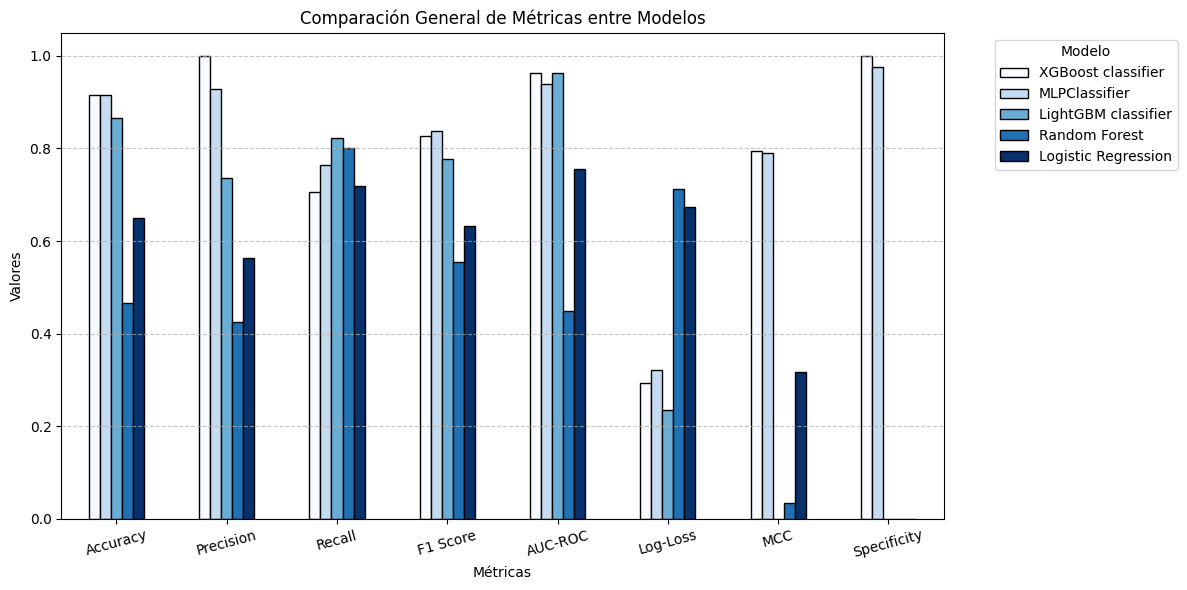

In [14]:
# Gráfica general con paleta azul salud
ax = metrics_data.plot(
    kind='bar',
    figsize=(12, 6),
    colormap='Blues',  # Paleta de colores basada en tonos azules
    edgecolor='black'
)
ax.set_title('Comparación General de Métricas entre Modelos')
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_xticks(range(len(metrics_data.index)))
ax.set_xticklabels(metrics_data.index, rotation=15)
ax.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar la estética
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# URL raw del archivo metrics.csv
url = "https://raw.githubusercontent.com/ricartorres/InsuficienciaC/master/scripts/training/metrics.csv"

# Leer el archivo CSV desde GitHub
df = pd.read_csv(url, delimiter=",")

# Preprocesar columnas
df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float) / 100  # Convertir porcentaje a flotante
numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Log-Loss', 'MCC', 'Specificity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')  # Asegurar numéricos

# Evaluar el mejor modelo para cada métrica
best_per_metric = {}
best_values_per_metric = {}

for metric in numeric_columns:
    if metric == 'Log-Loss':  # Para Log-Loss, buscamos el menor valor
        best_model_metric = df.loc[df[metric].idxmin()]
    else:  # Para las demás métricas, buscamos el mayor valor
        best_model_metric = df.loc[df[metric].idxmax()]

    best_per_metric[metric] = best_model_metric['Modelo']
    best_values_per_metric[metric] = best_model_metric[metric]

# Crear una tabla con los resultados
results_table = pd.DataFrame({
    'Métrica': numeric_columns,
    'Mejor Modelo': [best_per_metric[metric] for metric in numeric_columns],
    'Mejor Valor': [best_values_per_metric[metric] for metric in numeric_columns]
})

# Mostrar resultados
print("\nResumen de mejores modelos por métrica:")
print(results_table)



Resumen de mejores modelos por métrica:
       Métrica         Mejor Modelo  Mejor Valor
0     Accuracy   XGBoost classifier     0.916700
1    Precision   XGBoost classifier     1.000000
2       Recall  LightGBM classifier     0.823529
3     F1 Score        MLPClassifier     0.838710
4      AUC-ROC   XGBoost classifier     0.963064
5     Log-Loss  LightGBM classifier     0.234798
6          MCC   XGBoost classifier     0.795206
7  Specificity   XGBoost classifier     1.000000
